<a href="https://colab.research.google.com/github/Riddamz/py-bank-data-loan-classify/blob/main/bank_loan_classification_Farid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data & Library Preparation

In [ ]:
# #import library
# import warnings
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder
# # from sklearn.ensemble import RandomForestRegressor
# # from sklearn.linear_model import LinearRegression
# # from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier #KNN
# from xgboost import XGBClassifier
# from sklearn.preprocessing import LabelEncoder
# import statsmodels.api as sm
# from sklearn import linear_model
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
# from sklearn.feature_selection import RFE
# warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#upload dataset
df=pd.read_csv('/content/credit_train - Bank Loan Status Dataset - Copy.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,more than 10 years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


In [ ]:
#cek dimensi dataset
df.shape

(100000, 19)

In [ ]:
#cek value yg null di dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  int64  
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

In [ ]:
#cek kolom d dataframe
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

#Exploratory Data Analysis (EDA)

Deskripsi Kolom Dataset
- Loan Status (Status Pinjaman): Menunjukkan status pinjaman, seperti "Fully Paid" (Lunas) atau "Charged Off" (Dibatalkan).
- Current Loan Amount (Jumlah Pinjaman Saat Ini): Total jumlah pinjaman yang diambil oleh peminjam.
- Term (Jangka Waktu): Durasi pinjaman (misalnya, "Short Term" atau "Long Term").
- Credit Score (Skor Kredit): Skor kredit peminjam, yang merupakan ukuran kelayakan kredit.
- Annual Income (Pendapatan Tahunan): Pendapatan tahunan peminjam.
- Years in Current Job (Tahun di Pekerjaan Saat Ini): Jumlah tahun peminjam telah bekerja di pekerjaan saat ini.
- Home Ownership (Kepemilikan Rumah): Status kepemilikan rumah peminjam (misalnya, "Home Mortgage", "Own Home", "Rent").
- Purpose (Tujuan): Alasan mengambil pinjaman (misalnya, "Debt Consolidation", "Home Improvements").
- Monthly Debt (Hutang Bulanan): Pembayaran hutang bulanan peminjam.
- Years of Credit History (Tahun Riwayat Kredit): Total jumlah tahun peminjam memiliki riwayat kredit.
- Months Since Last Delinquent (Bulan Sejak Terakhir Menunggak): Jumlah bulan sejak peminjam terakhir kali menunggak pembayaran.
- Number of Open Accounts (Jumlah Akun Terbuka): Total jumlah akun kredit terbuka yang dimiliki peminjam.
- Number of Credit Problems (Jumlah Masalah Kredit): Total jumlah masalah kredit yang pernah dialami peminjam.
- Current Credit Balance (Saldo Kredit Saat Ini): Saldo saat ini dari semua akun kredit.
- Maximum Open Credit (Kredit Terbuka Maksimum): Jumlah kredit maksimum yang tersedia pada akun kredit terbuka mana pun.
- Bankruptcies (Kebangkrutan): Jumlah kebangkrutan yang pernah dinyatakan oleh peminjam.
- Tax Liens (Hak Gadai Pajak): Jumlah hak gadai pajak yang dimiliki oleh peminjam.

In [ ]:
#We drop ID column
df.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

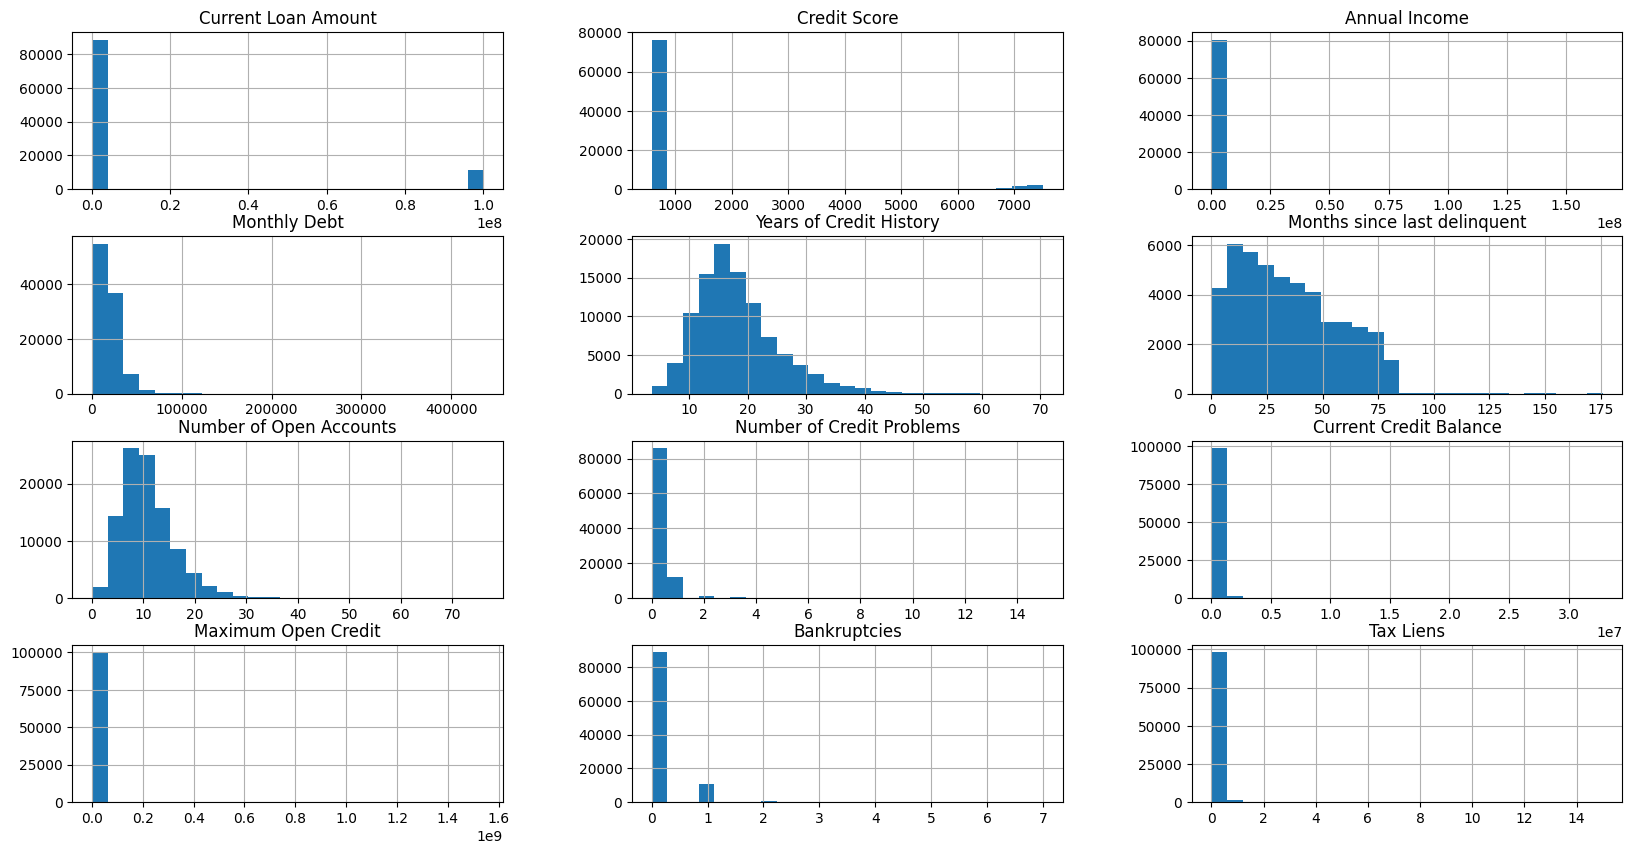

In [ ]:
#Visualizing Data menggunakan histogram
df.hist(bins=25,figsize=(20,10));

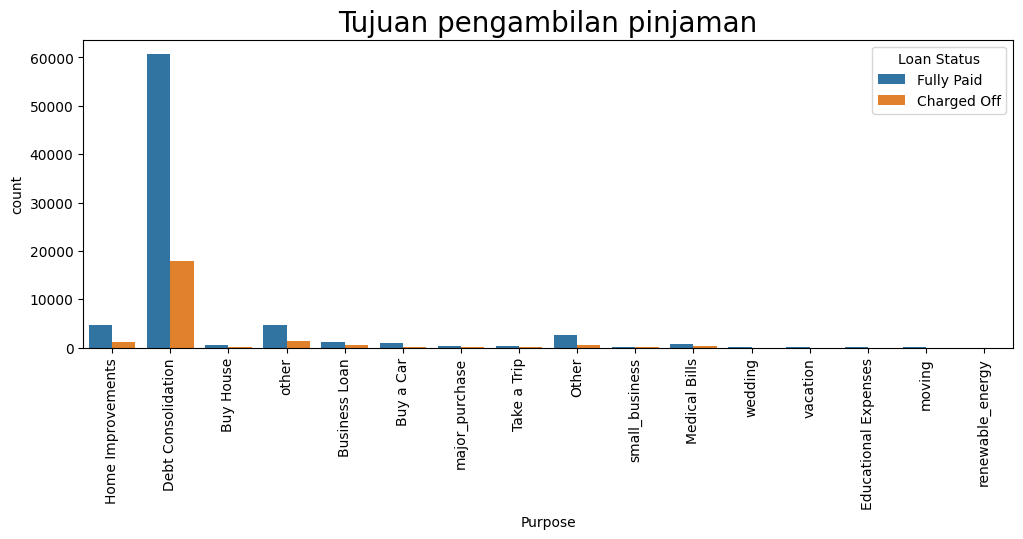

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='Purpose',data=df,hue='Loan Status')
plt.xticks(rotation=90)
plt.title('Tujuan pengambilan pinjaman',fontdict={'fontsize':20})
plt.show()

<Axes: xlabel='Loan Status', ylabel='count'>

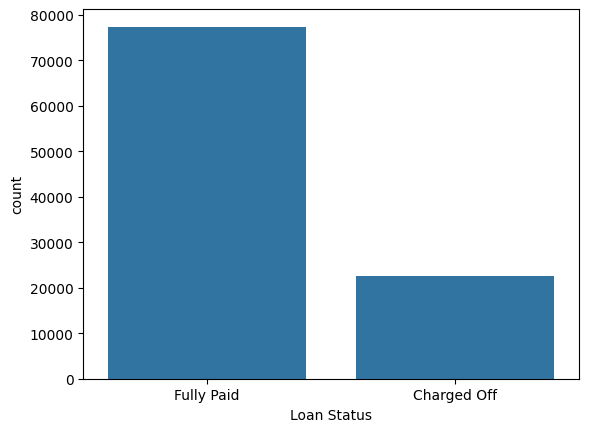

In [ ]:
sns.countplot(x='Loan Status', data = df)

<Axes: xlabel='Term', ylabel='count'>

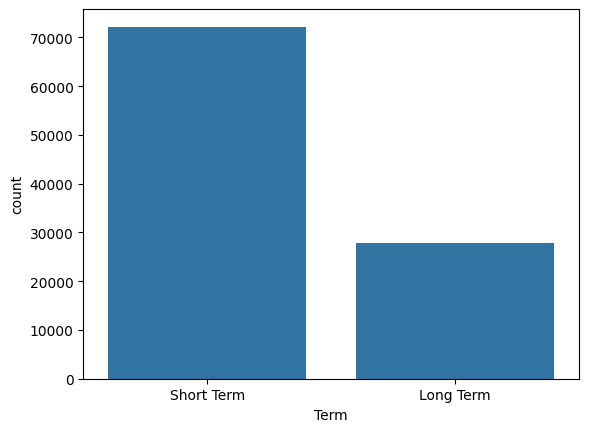

In [ ]:
sns.countplot(x='Term', data = df)

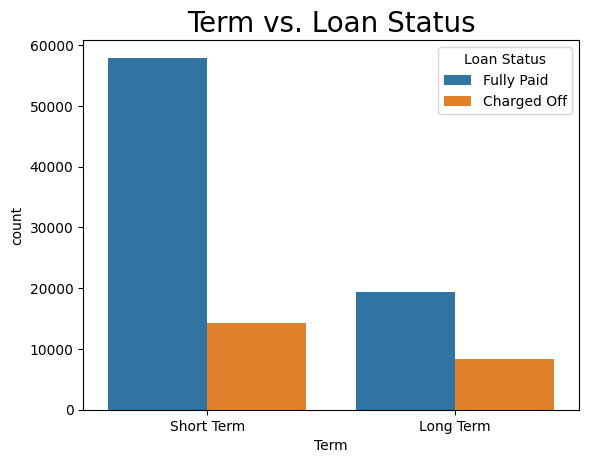

In [ ]:
sns.countplot(x='Term', data = df,hue='Loan Status')
plt.title('Term vs. Loan Status',fontdict={'fontsize':20})
plt.show()

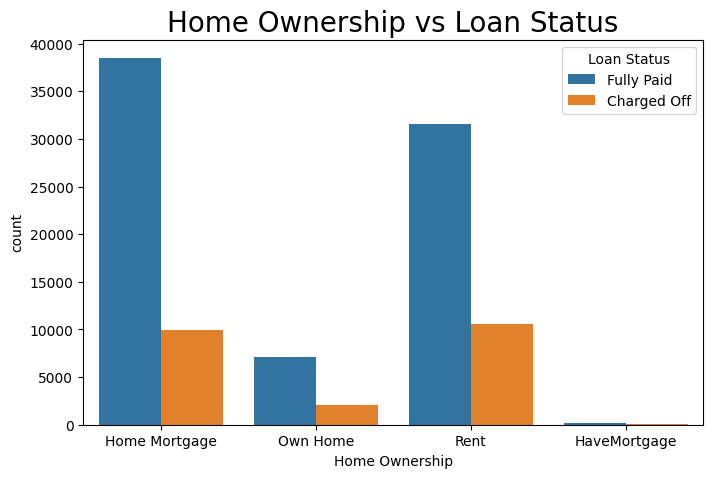

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Home Ownership',data=df,hue='Loan Status')
plt.title('Home Ownership vs Loan Status',fontdict={'fontsize':20})
plt.show()

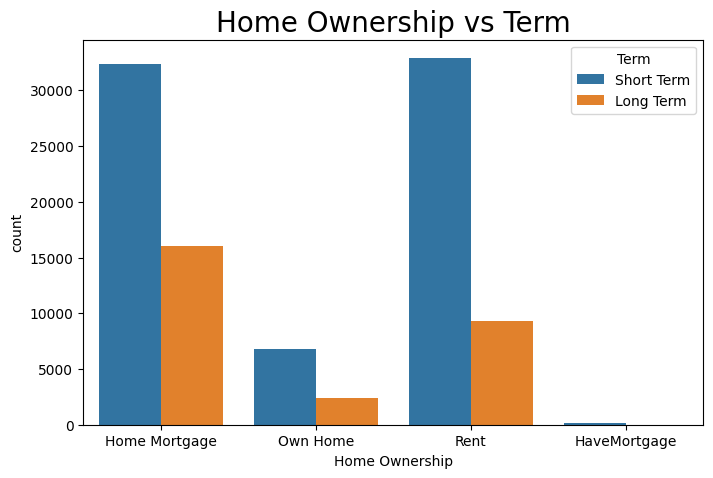

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Home Ownership',data=df,hue='Term')
plt.title('Home Ownership vs Term',fontdict={'fontsize':20})
plt.show()

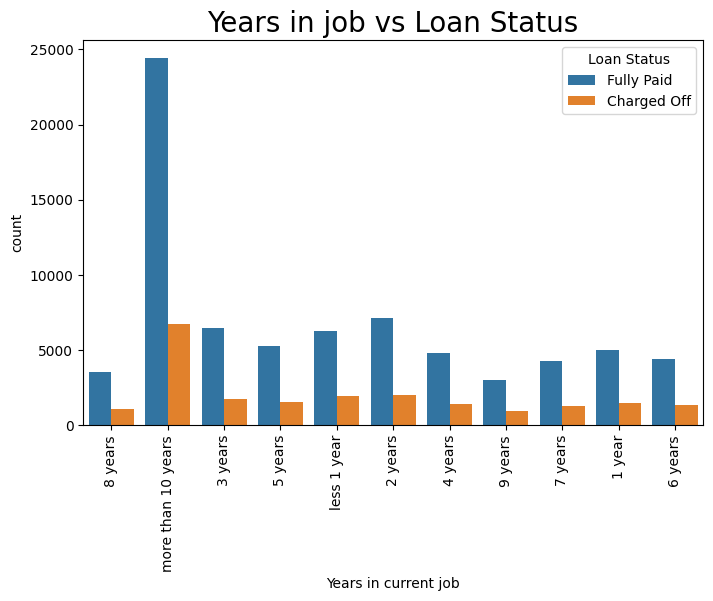

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Years in current job',data=df,hue='Loan Status')
plt.xticks(rotation=90)
plt.title('Years in job vs Loan Status',fontdict={'fontsize':20})
plt.show()

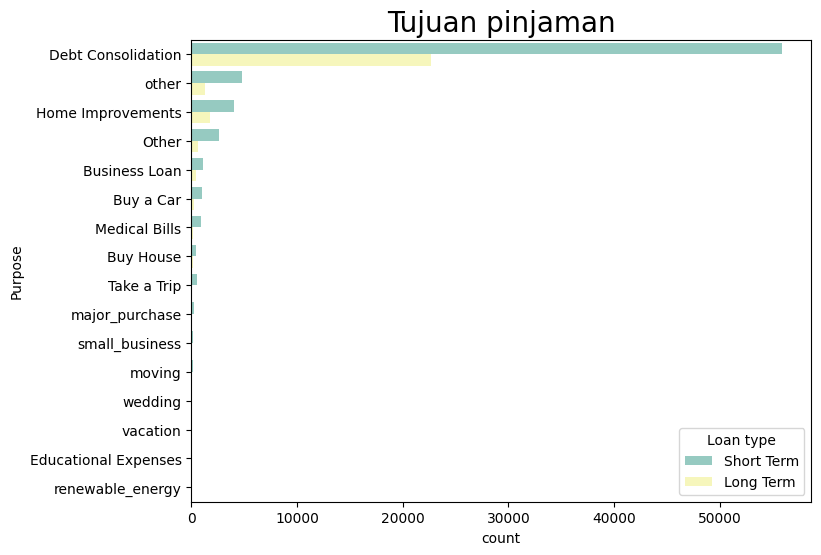

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y='Purpose' , data=df, order = df['Purpose'].value_counts().index,
              hue='Term', palette = 'Set3')
plt.title('Tujuan pinjaman' , fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="lower right");

In [ ]:
df.select_dtypes(include=np.number)

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412,709.0,1167493.0,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,262328,NaN,NaN,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,99999999,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,347666,721.0,806949.0,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,176220,NaN,NaN,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,147070,725.0,475437.0,2202.86,22.3,NaN,5,0,47766,658548.0,0.0,0.0
99996,99999999,732.0,1289416.0,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,103136,742.0,1150545.0,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,530332,746.0,1717524.0,9890.07,15.0,NaN,8,0,404225,738254.0,0.0,0.0


<Axes: >

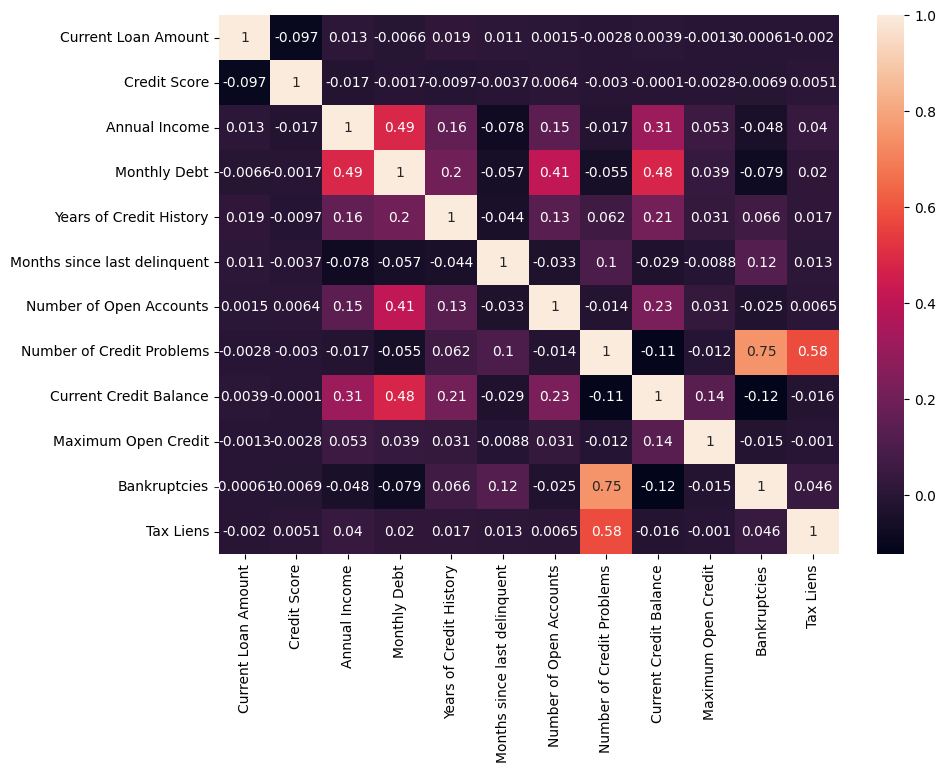

In [ ]:
#correlation matrix

numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,7))
sns.heatmap(numerical_df.corr(), annot= True)

<Axes: >

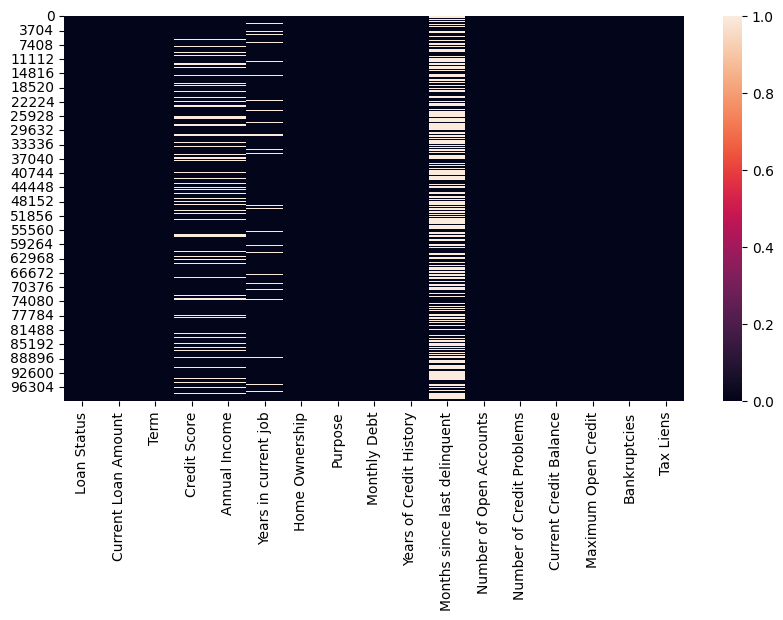

In [ ]:
#cek data yang missing
plt.figure(figsize=(10,5))
sns.heatmap( df.isnull())

In [ ]:
# Cek persentase data yang null
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df['Loan Status'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Months since last delinquent,53141,0.53141
Credit Score,19154,0.19154
Annual Income,19154,0.19154
Years in current job,4222,0.04222
Bankruptcies,204,0.00204
Tax Liens,10,0.00010
Maximum Open Credit,2,0.00002
Current Credit Balance,0,0.00000
Number of Credit Problems,0,0.00000
Number of Open Accounts,0,0.00000


- 51% data hilang secara total Bulan sejak tunggakan terakhir (Months since last delinquent).
- 19% dalam skor kredit dan pendapatan tahunan.

In [ ]:
# hapus kolom karena bnyk null
df.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [ ]:
# Cek kembali persentase data yang null
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df['Loan Status'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit Score,19154,0.19154
Annual Income,19154,0.19154
Years in current job,4222,0.04222
Bankruptcies,204,0.00204
Tax Liens,10,0.00010
Maximum Open Credit,2,0.00002
Loan Status,0,0.00000
Current Loan Amount,0,0.00000
Term,0,0.00000
Home Ownership,0,0.00000


In [ ]:
# pjadikan null data 0

df.fillna(0, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  object 
 1   Current Loan Amount        100000 non-null  int64  
 2   Term                       100000 non-null  object 
 3   Credit Score               100000 non-null  float64
 4   Annual Income              100000 non-null  float64
 5   Years in current job       100000 non-null  object 
 6   Home Ownership             100000 non-null  object 
 7   Purpose                    100000 non-null  object 
 8   Monthly Debt               100000 non-null  float64
 9   Years of Credit History    100000 non-null  float64
 10  Number of Open Accounts    100000 non-null  int64  
 11  Number of Credit Problems  100000 non-null  int64  
 12  Current Credit Balance     100000 non-null  int64  
 13  Maximum Open Credit        100

#ML


Training dan testing

In [ ]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [ ]:
df.head(8)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,Fully Paid,262328,Short Term,0.0,0.0,more than 10 years,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,Fully Paid,176220,Short Term,0.0,0.0,5 years,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174.0,0.0,0.0
5,Charged Off,206602,Short Term,7290.0,896857.0,more than 10 years,Home Mortgage,Debt Consolidation,16367.74,17.3,6,0,215308,272448.0,0.0,0.0
6,Fully Paid,217646,Short Term,730.0,1184194.0,less 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13,1,122170,272052.0,1.0,0.0
7,Charged Off,648714,Long Term,0.0,0.0,less 1 year,Home Mortgage,Buy House,14806.13,8.2,15,0,193306,864204.0,0.0,0.0


In [ ]:
# feature (X) = Data yang dipelajari AI untuk memlakukan prediksi data target
X = df.drop(["Loan Status","Term","Years in current job","Home Ownership","Purpose"],axis=1).values #df.drop disini hanya hapus d feture, tidak hapus kolom

#target (y) = data yang akan diprediksi oleh machine learning
y=df["Loan Status"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
X_train.shape

(80000, 11)

In [ ]:
y_train.shape

(80000,)

In [ ]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

# Modelling

In [ ]:
# logistic regression (LR)

#tahapan pembuatan object
model_LR = LogisticRegression()

#proses train data ke modul LR
model_LR.fit(X_train,y_train)

#proses prediksi data test
y_pred_LR = model_LR.predict(X_test)

In [ ]:
# decision Tree

#tahapan pembuatan object
model_DT = DecisionTreeClassifier()

#proses train data ke modul DT
model_DT.fit(X_train,y_train)

#proses prediksi data test
y_pred_DT = model_DT.predict(X_test)

In [ ]:
# Random Forest

#tahapan pembuatan object
model_RF = RandomForestClassifier()

#proses train data ke modul RF
model_RF.fit(X_train,y_train)

#proses prediksi data test
y_pred_RF = model_RF.predict(X_test)

In [ ]:
# SVM (support Vector Machine)

#tahapan pembuatan object
model_SVM = SVC()

#proses train data ke modul RF
model_SVM.fit(X_train,y_train)

#proses prediksi data test
y_pred_SVM = model_SVM.predict(X_test)

In [ ]:
# KNN

#tahapan pembuatan object
model_KNN = KNeighborsClassifier()

#proses train data ke modul RF
model_KNN.fit(X_train,y_train)

#proses prediksi data test
y_pred_KNN = model_KNN.predict(X_test)

# Model evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Logistic regression
print("LR classification report : \n{}\n".format(classification_report(y_test,y_pred_LR)))
print("LR accuracy score : \n{}".format(accuracy_score(y_test,y_pred_LR)))
print("\nLR confusion matrix : \n{}".format(confusion_matrix(y_test,y_pred_LR)))

LR classification report : 
              precision    recall  f1-score   support

 Charged Off       0.91      0.21      0.34      4531
  Fully Paid       0.81      0.99      0.89     15469

    accuracy                           0.82     20000
   macro avg       0.86      0.60      0.62     20000
weighted avg       0.83      0.82      0.77     20000


LR accuracy score : 
0.81575

LR confusion matrix : 
[[  943  3588]
 [   97 15372]]


In [ ]:
# random forest
print("RF classification report : \n{}\n".format(classification_report(y_test,y_pred_RF)))
print("RF accuracy score : \n{}".format(accuracy_score(y_test,y_pred_RF)))
print("\nRF confusion matrix : \n{}".format(confusion_matrix(y_test,y_pred_RF)))

RF classification report : 
              precision    recall  f1-score   support

 Charged Off       0.88      0.23      0.37      4531
  Fully Paid       0.82      0.99      0.89     15469

    accuracy                           0.82     20000
   macro avg       0.85      0.61      0.63     20000
weighted avg       0.83      0.82      0.78     20000


RF accuracy score : 
0.81905

RF confusion matrix : 
[[ 1059  3472]
 [  147 15322]]


In [ ]:
# decission tree
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

 Charged Off       0.45      0.44      0.45      4531
  Fully Paid       0.84      0.84      0.84     15469

    accuracy                           0.75     20000
   macro avg       0.65      0.64      0.64     20000
weighted avg       0.75      0.75      0.75     20000



In [ ]:
# SVM
print(classification_report(y_test,y_pred_SVM))

              precision    recall  f1-score   support

 Charged Off       0.00      0.00      0.00      4531
  Fully Paid       0.77      1.00      0.87     15469

    accuracy                           0.77     20000
   macro avg       0.39      0.50      0.44     20000
weighted avg       0.60      0.77      0.67     20000



In [ ]:
# KNN
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

 Charged Off       0.32      0.15      0.20      4531
  Fully Paid       0.78      0.91      0.84     15469

    accuracy                           0.73     20000
   macro avg       0.55      0.53      0.52     20000
weighted avg       0.68      0.73      0.70     20000



Analisis Laporan Klasifikasi Random Forest
Memahami Laporan

Laporan ini memberikan evaluasi kinerja model klasifikasi Random Forest yang telah dilatih untuk memprediksi status pinjaman (Charged Off atau Fully Paid).
Mari kita bahas metrik-metrik utama yang ada:
- Precision: Proporsi prediksi positif (Charged Off) yang benar. Semakin tinggi precision, semakin sedikit false positive (memperkirakan Charged Off padahal sebenarnya Fully Paid).
- Recall: Proporsi aktual positif (Charged Off) yang berhasil diprediksi Semakin tinggi recall, semakin sedikit false negative (memperkirakan Fully Paid padahal sebenarnya Charged Off).
- F1-score: Nilai rata-rata harmonik antara precision dan recall. Ini memberikan gambaran yang lebih seimbang tentang kinerja model.
- Support: Jumlah sampel dalam setiap kelas.
- Accuracy: Proporsi total prediksi yang benar.
- Macro average: Rata-rata sederhana dari metric untuk setiap kelas.
Weighted average: Rata-rata tertimbang dari metric untuk setiap kelas, memperhitungkan proporsi setiap kelas dalam dataset.
- Confusion matrix: Tabel yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.

Interpretasi Hasil
- Kinerja Overall Baik: Accuracy sebesar 0.81905 menunjukkan bahwa model secara keseluruhan mampu memprediksi status pinjaman dengan akurasi yang cukup baik.
- Ketidakseimbangan Kelas: Kelas "Fully Paid" memiliki jumlah sampel yang jauh lebih banyak dibandingkan kelas "Charged Off". Ini bisa mempengaruhi kinerja model, terutama untuk kelas minoritas (Charged Off).
- Precision Tinggi untuk Kelas Fully Paid: Model sangat baik dalam mengidentifikasi pinjaman yang benar-benar akan dilunasi (Fully Paid). Namun, model kurang baik dalam mengidentifikasi pinjaman yang akan macet (Charged Off).
- Recall Rendah untuk Kelas Charged Off: Model seringkali gagal mengidentifikasi pinjaman yang akan macet. Hal ini bisa menjadi masalah serius, karena gagal mengidentifikasi pinjaman bermasalah dapat mengakibatkan kerugian finansial.

Analisis Lebih Lanjut
- Imbalanse Kelas: Karena adanya ketidakseimbangan kelas, pertimbangkan untuk menggunakan teknik seperti oversampling, undersampling, atau cost-sensitive learning untuk meningkatkan kinerja model pada kelas minoritas (Charged Off).
- Analisis Fitur: Lakukan analisis fitur untuk memahami fitur mana yang paling berkontribusi terhadap prediksi. Fitur-fitur penting dapat digunakan untuk meningkatkan model atau untuk menyusun strategi bisnis yang lebih baik.
- Threshold Adjustment: Jika lebih penting untuk mengidentifikasi semua kasus Charged Off (meningkatkan recall), pertimbangkan untuk menyesuaikan threshold pada probabilitas prediksi.
- Model Lain: Coba model klasifikasi lain seperti XGBoost, LightGBM, atau Neural Networks untuk melihat apakah ada peningkatan kinerja.
- Hyperparameter Tuning: Sesuaikan hyperparameter dari Random Forest untuk mencari kombinasi terbaik yang meningkatkan kinerja model.

Kesimpulan
Model Random Forest yang telah dibangun mampu memprediksi status pinjaman dengan akurasi yang cukup baik, terutama untuk kelas mayoritas (Fully Paid). Namun, model masih perlu ditingkatkan untuk meningkatkan kemampuannya dalam mengidentifikasi pinjaman yang akan macet (Charged Off). Beberapa teknik seperti penanganan ketidakseimbangan kelas, analisis fitur, dan penyesuaian hyperparameter dapat digunakan untuk meningkatkan kinerja model.

Rekomendasi

- Fokus pada Kelas Minoritas: Prioritaskan peningkatan kinerja model pada kelas "Charged Off" karena konsekuensi finansial yang lebih besar jika gagal mengidentifikasinya.
- Analisis Lebih Lanjut: Lakukan analisis lebih lanjut untuk memahami alasan di balik kinerja yang kurang baik pada kelas minoritas.
- Implementasi dalam Bisnis: Gunakan model yang sudah baik untuk membuat keputusan bisnis yang lebih baik, seperti memberikan skor kredit yang lebih akurat atau mengidentifikasi nasabah yang berisiko tinggi.

Catatan:

Interpretasi ini bersifat umum dan dapat bervariasi tergantung pada konteks bisnis dan tujuan spesifik dari model klasifikasi.

Apakah Anda ingin melakukan analisis lebih lanjut pada data ini? Jika ya, silakan berikan informasi tambahan seperti:

- Data lengkap: Jika memungkinkan, berikan data lengkap sehingga saya dapat melakukan analisis yang lebih mendalam.
- Pertanyaan spesifik: Ajukan pertanyaan spesifik yang ingin Anda jawab.
- Visualisasi tambahan: Mintalah jenis visualisasi lain yang ingin Anda lihat.